# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : IF13 - Scipy
- Anggota : </br>
10122901 - Aip Ariyadi</br>
10122907 - Vina Lestari</br>
10122918 - Muhamad Farhan

## Menentukan Pertanyaan Bisnis

- Dari seluruh kategori produk yang tersedia, dilihat dari penjualannya, apakah ada kategori yang menjadi favorit pelanggan dan kategori yang kurang diminati? - 10122901 - Aip Ariyadi
- Apakah terdapat tipe pembayaran yang mendominasi transaksi,  Bagaimana perbandingan preferensi di antara tipe pembayaran yang ada? - 10122901 - Aip Ariyadi
- Apakah terdapat pola khusus dalam pembelian yang berkorelasi dengan peristiwa khusus pada hari tertentu setiap tahunnya? - 10122907 - Vina Lestari
- Apakah terdapat perbedaan dalam volume pembelian dari berbagai kota dengan masing - masing tingkat geografis? - 10122907 - Vina Lestari
- Berapa banyak pelanggan yang melakukan pembelian hanya sekali dan tidak kembali lagi? - 10122918 - Muhamad Farhan
- Apakah ada kelompok pelanggan yang cenderung membeli produk dengan nilai transaksi lebih rendah dan nilai transaksi lebih tinggi? - 10122918 - Muhamad Farhan

## Menyiapkan semua library yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [2]:
#Mengambil Data Product dari products_dataset.csv
df_products = pd.read_csv("https://raw.githubusercontent.com/ariyadiaip/ScipyAnalisisData/main/products_dataset.csv")
display(df_products.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
#Mengambil Data Product Category Name Translation dari product_category_name_translation.csv
df_products_category_translation = pd.read_csv("https://raw.githubusercontent.com/ariyadiaip/ScipyAnalisisData/main/product_category_name_translation.csv")
display(df_products_category_translation.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
#Mengambil Data Order dari orders_dataset.csv
df_orders = pd.read_csv('https://raw.githubusercontent.com/ariyadiaip/ScipyAnalisisData/main/orders_dataset.csv')
display(df_orders.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
#Mengambil Data Order Item dari order_items_dataset.csv
df_order_items = pd.read_csv("https://raw.githubusercontent.com/ariyadiaip/ScipyAnalisisData/main/order_items_dataset.csv")
display(df_order_items.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#Mengambil Data Order Payments dari order_items_dataset.csv
df_order_payments = pd.read_csv("https://raw.githubusercontent.com/ariyadiaip/ScipyAnalisisData/main/order_payments_dataset.csv")
display(df_order_payments.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
#Mengambil Data Customer dari customers_dataset.csv
df_customers = pd.read_csv('https://raw.githubusercontent.com/ariyadiaip/ScipyAnalisisData/main/customers_dataset.csv')
display(df_customers.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

untuk analisis data pada permasalahan ke-1, atribut yang akan digunakan adalah 'product_id', 'product_category_name', 'product_category_name_english' pada Dataset Order Items, Dataset Products, serta Dataset Product Category Name Translation. Langkah pertama yaitu menngecek apakah ada nilai null pada semua dataset yang akan digunakan.

In [8]:
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

dapat dilihat pada hasil pemeriksaan untuk atribut 'product_id' pada Dataset Order Items tidak ada yang bernilai null, sehingga untuk Dataset ini untuk tahap cleaning data dapat diabaikan.

In [9]:
df_products_category_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

dapat dilihat pada hasil pemeriksaan untuk Dataset Product Category Name Translation tidak ada data yang bernilai null, sehingga untuk Dataset ini untuk tahap cleaning data dapat diabaikan.

In [10]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

dapat dilihat pada hasil pemeriksaan untuk atribut 'product_category_name' pada Dataset Products terdapat data yang bernilai null, sehingga pada tahan cleaning data, untuk dataset ini perlu penyesuaian. Penyesuaiannya meliputi:</br>
- Pada Dataset Products, kita akan mengisi nilai null pada atribut 'product_category_name' menjadi 'uncategorized'
- Pada Dataset Product Category Name Translation, kita akan menambahkan 1 baris untuk kategori 'uncategorized'

untuk analisis data pada permasalahan ke-2, atribut yang akan digunakan adalah 'payment_type' pada Dataset Order Payments. Langkah pertama yaitu menngecek apakah ada nilai null pada dataset yang akan digunakan.

In [11]:
df_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

dapat dilihat pada hasil pemeriksaan untuk Dataset Order Payments tidak ada data yang bernilai null, sehingga untuk Dataset ini untuk tahap cleaning data dapat diabaikan.

Untuk menganalisis permasalahan ke-3, atribut yang digunakan meliputi:
- 'order_id' dan 'order_purchase_timestamp' pada _Orders Dataset_
- 'order_id' dan 'product_id' pada _Orders Item Dataset_
- 'product_id' dan 'product_category_name' pada _Products Dataset_
  
Langkah pertama melakukan pengecekan ada atau tidaknya nilai null pada semua dataset yang digunakan.

In [12]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dari hasil pengecekan di atas dapat dilihat bahwa atribut 'order_id' dan 'order_purchase_timestamp' tidak ada yang bernilai null sehingga dataset ini tidak melalui tahap cleaning data.

Lalu untuk Dataset Order Items dan Dataset Products sudah dicek di permasalahan sebelumnya, sehingga akan mengikuti hasil pengecekan yang sebelumnya.

Untuk menganalisis permasalahan ke-4, atribut yang digunakan meliputi:
- 'order_id' dan 'customer_id' pada _Orders Dataset_
- 'customer_id' dan 'customer_zip_code_prefix' pada _Customers Dataset_
  
Langkah pertama melakukan pengecekan ada atau tidaknya nilai null pada semua dataset yang digunakan.

Untuk atribut 'order_id' dan 'customer_id' pada Orders Dataset telah dilakukan pengecekan pada permasalahan sebelumnya. Kedua atribut tersebut tidak ada yang bernilai null sehingga dataset ini tidak melalui tahap cleaning data.

In [13]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Dari hasil pengecekan di atas dapat dilihat bahwa atribut 'customer_id' dan 'customer_zip_code_prefix' tidak ada yang bernilai null sehingga dataset ini tidak melalui tahap cleaning data.

untuk analisis data pada permasalahan ke-5, atribut yang akan digunakan adalah 'customer_id','customer_unique_id' pada Dataset Customers. Langkah pertama yaitu mengecek apakah ada nilai null pada dataset yang akan digunakan.

Untuk atribut 'customer_id','customer_unique_id' pada Dataset Customers telah dilakukan pengecekan pada permasalahan sebelumnya. Kedua atribut tersebut tidak memiliki nilai yang null sehingga dataset ini untuk tahap Cleaning Data dapat diabaikan.

untuk analisis data pada permasalahan ke-6, atribut yang akan digunakan adalah 'payment_value', 'customer_id', 'order_id.' pada Dataset Orders, Dataset Order Items, serta Dataset Order Payments. Langkah pertama yaitu mengecek apakah ada nilai null pada dataset yang akan digunakan.

Untuk Dataset ini pun sudah dilakukan pengecekan sebelumnya. Dan tidak akan diproses pada tahap Cleaning Data.

### Cleaning Data

Pengisian nilai null pada atribut 'product_category_name' Dataset Products

In [14]:
#Menggantikan nilai null di kolom 'product_category_name' dengan 'uncategorized'
df_products['product_category_name'].fillna('uncategorized', inplace=True)
df_products.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Menambahkan 1 baris untuk kategori 'uncategorized' pada Dataset Product Category Name Translation

In [15]:
#Membuat DataFrame baru untuk baris yang akan ditambahkan
new_row = pd.DataFrame({'product_category_name': ['uncategorized'],
                        'product_category_name_english': ['uncategorized']})

#Menggunakan pandas.concat untuk menambahkan baris baru pada DataFrame Utama
df_products_category_translation = pd.concat([df_products_category_translation, new_row], ignore_index=True)

In [16]:
#Menampilkan DataFrame setelah penambahan baris baru
display(df_products_category_translation.tail())

,product_category_name,product_category_name_english
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,uncategorized,uncategorized


## Exploratory Data Analysis (EDA)

### Explore ...

Untuk permasalahan ke-1 kita akan menggabungkan ketiga dataframe yang akan digunakan terlebih dulu yaitu df_products, df_products_category_translation, dan df_order_items. lalu mengecek apakah ada perbedaan data setelah proses penggabungan

In [17]:
#Menggabungkan Ketiga Dataframe yang akan digunakan berdasarkan atribut kuncinya
df_order_details = pd.merge(df_order_items, df_products, on='product_id')
df_order_details = pd.merge(df_order_details, df_products_category_translation, on='product_category_name', how='left')

#Mengecek hasil penggabungan dataframe
display(df_order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          112650 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

None

Berdasarkan hasil pengecekan, ternyata masih terdapat perbedaan kelengkapan data yaitu pada kolom 'product_category_name_english' yang akan digunakan. Dari Total 112650 data, hanya 112626 baris data yang kolom 'product_category_name_english' terisi. Ini berarti ada 24 Data yang masih null. Langkah selanjutnya kita akan mengisi nilai yang null tersebut.

In [18]:
#Memfilter baris dengan nilai null di kolom 'product_category_name_english'
df_result_null_english = df_order_details[df_order_details['product_category_name_english'].isnull()]

#Mencari daftar kategori yang belum memiliki terjemahan
null_english_categories = df_result_null_english['product_category_name'].unique()

print("Kategori Produk yang belum memiliki terjemahan:")
print(null_english_categories)

Kategori Produk yang belum memiliki terjemahan:
['portateis_cozinha_e_preparadores_de_alimentos' 'pc_gamer']


Dari hasil pengecekan terdapat 2 kategori produk yang belum memiliki terjemahan kategori dalam bahasa inggris. Langkah berikutnya kita akan mengisi kekosongan tersebut.

In [19]:
#Membuat pemetaan terjemahan kategori yang akan diisi
category_translation_mapping = {
    'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_reparers',
    'pc_gamer': 'gaming_pc'
}

#Menambahkan terjemahan kategori pada dataframe asal
df_order_details['product_category_name_english'] = df_order_details['product_category_name_english'].fillna(df_order_details['product_category_name'].map(category_translation_mapping))
display(df_order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          112650 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

None

Setelah memastikan semua data yang akan digunakan pada dataframe gabungan tidak ada yang kosong, kita bisa memulai analisis lebih lanjut yaitu menghitung total data penjualan berdasarkan kategori produknya.

In [20]:
#Menghitung total produk yang dijual untuk setiap kategori yang ada
category_counts = df_order_details.groupby('product_category_name_english').size().reset_index(name='total_items')

#Mengurutkan hasil dari yang terbesar
category_counts = category_counts.sort_values(by='total_items', ascending=False)

print(category_counts)

   product_category_name_english  total_items
7                 bed_bath_table        11115
44                 health_beauty         9670
67                sports_leisure         8641
39               furniture_decor         8334
15         computers_accessories         7827
..                           ...          ...
53                    la_cuisine           14
11             cds_dvds_musicals           14
42                     gaming_pc            9
29     fashion_childrens_clothes            8
63         security_and_services            2

[74 rows x 2 columns]


dari hasil perhitungan diatas, terdapat selisih yang cukup tinggi antara kategori terlaris yaitu 11.115 items dan 2 items untuk kategori terbawah. Dalam analisis berikutnya kita akan mengelompokkan kategori produk yang menjadi favorit pelanggan, dan kategori produk yang kurang diminati.

</br>

Untuk permasalahan ke-2 kita akan menggunakan satu dataframe yaitu df_order_payments. Pertama kita akan menghitung ada berapa transaksi yang dilakukan untuk setiap tipe pembayaran dan berapa total nominalnya.

In [21]:
#Menghitung jumlah transaksi untuk setiap tipe pembayaran
transaction_counts = df_order_payments['payment_type'].value_counts()

#Menghitung total nominal pembayaran untuk setiap tipe pembayaran
total_payment_amounts = df_order_payments.groupby('payment_type')['payment_value'].sum()

#Membuat dataframe baru untuk menampung hasil perhitungan
df_payments_summary = pd.DataFrame({
    'Jumlah Transaksi': transaction_counts,
    'Total Nominal Pembayaran': total_payment_amounts
})

print(df_payments_summary)

              Jumlah Transaksi  Total Nominal Pembayaran
payment_type                                            
boleto                   19784                2869361.27
credit_card              76795               12542084.19
debit_card                1529                 217989.79
not_defined                  3                      0.00
voucher                   5775                 379436.87


Dari hasil perhitungan tersebut, ternyata ada tipe pembayaran 'not_defined' namun dikarenakan Total Nominal Pembayarannya 0 maka kita bisa menghapus data tersebut. Dan kita akan mengurutkan dataframe tersebut berdasarkan banyaknya jumlah transaksi.

In [22]:
#Menghapus tipe pembayaran 'not_defined'
df_payments_summary = df_payments_summary[(df_payments_summary.index != 'not_defined')]

#Mengurutkan dataframe berdasarkan jumlah transaksi
df_payments_summary = df_payments_summary.sort_values(by='Jumlah Transaksi', ascending=False)

print(df_payments_summary)

              Jumlah Transaksi  Total Nominal Pembayaran
payment_type                                            
credit_card              76795               12542084.19
boleto                   19784                2869361.27
voucher                   5775                 379436.87
debit_card                1529                 217989.79


</br>

Permasalahan ke-3

Menggabungkan ketiga dataframe yang akan digunakan terlebih dulu yaitu df_orders, df_order_items, dan df_products. Lalu melakukan pengecekan ada atau tidaknya perbedaan data setelah proses penggabungan.

In [23]:
#Menggabungkan Ketiga Dataframe yang akan digunakan berdasarkan atribut kuncinya
df_order_m = pd.merge(df_orders, df_order_items, on='order_id')
df_order_merge = pd.merge(df_order_m, df_products, on='product_id', how='left')

#Mengecek hasil penggabungan dataframe
display(df_order_merge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

None

Berdasarkan hasil pengecekan di atas didapat bahwa tidak ada perbedaan kelengkapan data dengan total 112650 kelengkapan data. Selanjutnya menampilkan kolom hasil penggabungan dataframe

In [24]:
display(df_order_merge.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


Kemudian membuang semua kolom yang tidak diperlukan dan mengurutkan semua data berdasarkan tanggal.

In [25]:
df_order_merge = df_order_merge[['order_id', 'order_purchase_timestamp', 'product_id', 'product_category_name']]
df_order_merge = df_order_merge.sort_values('order_purchase_timestamp')

display(df_order_merge.head())

,order_id,order_purchase_timestamp,product_id,product_category_name
5085,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,c1488892604e4ba5cff5b4eb4d595400,moveis_decoracao
5086,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,f293394c72c9b5fafd7023301fc21fc2,moveis_decoracao
4925,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,f3c2d01a84c947b078e32bbef0718962,telefonia
34803,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
34804,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude


Selanjuknya menyatukan kategori produk berdasarkan tanggal pemesanan.

In [26]:
df_order_merge['order_purchase_timestamp'] = pd.to_datetime(df_order_merge['order_purchase_timestamp'])

# Extract only the date part
df_order_merge['date'] = df_order_merge['order_purchase_timestamp'].dt.date
df_count_order = df_order_merge['date'].value_counts().reset_index()

# Group by the date and concatenate values in 'product_category_name'
def convert_to_string(product_category_name):
    if isinstance(product_category_name, float):
        return str(product_category_name)
    else:
        return product_category_name
        
df_result = df_order_merge.groupby('date')['product_category_name'].apply(lambda x: ', '.join(map(convert_to_string, x))).reset_index()
df_result = pd.merge(df_result, df_count_order, on='date')

# Display the resulting DataFrame
# Split into three DataFrames per year
df_result['year'] = pd.to_datetime(df_result['date']).dt.year

df_result_2016 = df_result[df_result['year'] == 2016].copy()
df_result_2017 = df_result[df_result['year'] == 2017].copy()
df_result_2018 = df_result[df_result['year'] == 2018].copy()

# Display the resulting DataFrames
display(df_result_2016.sort_values('count', ascending=False))
display(df_result_2017.sort_values('count', ascending=False))
display(df_result_2018.sort_values('count', ascending=False))

,date,product_category_name,count,year
5,2016-10-04,"uncategorized, consoles_games, utilidades_dome...",69,2016
7,2016-10-06,"moveis_decoracao, beleza_saude, moveis_decorac...",58,2016
6,2016-10-05,"fashion_roupa_masculina, informatica_acessorio...",56,2016
8,2016-10-07,"perfumaria, perfumaria, perfumaria, brinquedos...",52,2016
9,2016-10-08,"relogios_presentes, consoles_games, fashion_bo...",45,2016
11,2016-10-10,"brinquedos, beleza_saude, telefonia, audio, fa...",40,2016
10,2016-10-09,"beleza_saude, perfumaria, livros_interesse_ger...",34,2016
4,2016-10-03,"relogios_presentes, esporte_lazer, esporte_laz...",8,2016
2,2016-09-15,"beleza_saude, beleza_saude, beleza_saude",3,2016
0,2016-09-04,"moveis_decoracao, moveis_decoracao",2,2016


,date,product_category_name,count,year
336,2017-11-24,"ferramentas_jardim, cama_mesa_banho, cama_mesa...",1366,2017
337,2017-11-25,"ferramentas_jardim, beleza_saude, telefonia, c...",580,2017
339,2017-11-27,"moveis_decoracao, brinquedos, brinquedos, info...",474,2017
338,2017-11-26,"cama_mesa_banho, informatica_acessorios, telef...",456,2017
340,2017-11-28,"informatica_acessorios, cool_stuff, moveis_dec...",431,2017
...,...,...,...,...
18,2017-01-10,"cama_mesa_banho, ferramentas_jardim, cama_mesa...",6,2017
17,2017-01-09,"moveis_decoracao, moveis_decoracao, pet_shop, ...",6,2017
16,2017-01-08,"telefonia_fixa, cama_mesa_banho, moveis_decora...",6,2017
15,2017-01-07,"moveis_decoracao, beleza_saude, cool_stuff, co...",5,2017


,date,product_category_name,count,year
592,2018-08-07,"beleza_saude, beleza_saude, beleza_saude, fash...",431,2018
591,2018-08-06,"telefonia, relogios_presentes, automotivo, rel...",430,2018
508,2018-05-15,"relogios_presentes, moveis_sala, moveis_sala, ...",423,2018
500,2018-05-07,"eletronicos, informatica_acessorios, relogios_...",421,2018
507,2018-05-14,"cool_stuff, pet_shop, beleza_saude, esporte_la...",413,2018
...,...,...,...,...
610,2018-08-25,"beleza_saude, papelaria, papelaria, construcao...",75,2018
612,2018-08-27,"esporte_lazer, construcao_ferramentas_construc...",71,2018
613,2018-08-28,"esporte_lazer, informatica_acessorios, audio, ...",45,2018
614,2018-08-29,"beleza_saude, beleza_saude, beleza_saude, bele...",16,2018


Mengambil jumlah pesanan berdasarkan tanggal dan bulan pemesanan yang sama di antara 3 tahun tersebut.

In [27]:
df_order_merge['order_purchase_timestamp'] = pd.to_datetime(df_order_merge['order_purchase_timestamp'])

# Extract month and day
df_order_merge['month'] = df_order_merge['order_purchase_timestamp'].dt.month
df_order_merge['day'] = df_order_merge['order_purchase_timestamp'].dt.day

# Count orders by month and day
df_count_order = df_order_merge.groupby(['month', 'day'])['order_purchase_timestamp'].count().reset_index()
df_count_order.columns = ['month', 'day', 'count']

# Group by month and day and concatenate product categories
df_result = df_order_merge.groupby(['month', 'day'])['product_category_name'].apply(lambda x: ', '.join(x)).reset_index()
df_result = pd.merge(df_result, df_count_order, on=['month', 'day'])

# Sort by count
df_result = df_result.sort_values('count', ascending=False)

# Display
display(df_result.head())

,month,day,product_category_name,count
327,11,24,"ferramentas_jardim, cama_mesa_banho, cama_mesa...",1366
218,8,7,"informatica_acessorios, pet_shop, telefonia, a...",613
134,5,15,"moveis_decoracao, esporte_lazer, moveis_decora...",594
328,11,25,"ferramentas_jardim, beleza_saude, telefonia, c...",580
135,5,16,"relogios_presentes, informatica_acessorios, co...",578


 </br>

Permasalahan 4

Menggabungkan kedua dataframe yang akan digunakan terlebih dulu yaitu df_order, df_customers. Lalu melakukan pengecekan ada atau tidaknya perbedaan data setelah proses penggabungan.

In [28]:
#Menggabungkan Dua Dataframe yang akan digunakan berdasarkan atribut kuncinya
df_locOrder_details = pd.merge(df_orders, df_customers, on='customer_id')

#Mengecek hasil penggabungan dataframe
display(df_locOrder_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


None

Berdasarkan hasil pengecekan di atas didapat bahwa tidak ada perbedaan kelengkapan data dengan total 112650 kelengkapan data. Selanjutnya menampilkan kolom hasil penggabungan dataframe.

In [29]:
display(df_locOrder_details.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Kemudian membuang semua kolom yang tidak diperlukan.

In [30]:
df_locOrder_merge = df_locOrder_details[['order_id', 'customer_id', 'customer_zip_code_prefix', 'customer_city']]
df_locOrder_merge = df_locOrder_merge.sort_values('customer_city')

display(df_locOrder_merge.head())

,order_id,customer_id,customer_zip_code_prefix,customer_city
49914,50ba38c4dc467baab1ea2c8c7747934d,9e01f714a2b3b8962c222cf2b74c20dc,38540,abadia dos dourados
77711,d99e6849f7676dade195f20c26f0eb4f,a23e3f9a2b656b23b7e52075964b42cd,38540,abadia dos dourados
97625,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,f11eb8f0b8b87510a93e3e1aa10b0ade,38540,abadia dos dourados
67596,3f1294f87d79b57f5d55ba7b80c3d94f,576d71ddb21b21763cfedce73b902180,72940,abadiania
844,6c12feac9a308e1382d9b19cca7f20b2,5371894984937a27cf40c7d20699a786,35620,abaete


Mengambil 5 Kota Teratas dan 5 Kota Terbawah

In [31]:
#count
locOrder_count = df_locOrder_merge['customer_city'].value_counts()

# Convert locOrder_count menjadi dataframe
city_counts_df = pd.DataFrame(locOrder_count).reset_index()
city_counts_df.columns = ['customer_city', 'qty']
city_counts_df_sort = city_counts_df.sort_values('qty' , ascending=True)

# Display DataFrame
display(city_counts_df.head())

#desc sort
display(city_counts_df_sort.head())

,customer_city,qty
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


,customer_city,qty
4118,lagoao,1
3364,serra branca,1
3363,serra bonita,1
3362,tuparece,1
3361,serra azul,1


</br>

Untuk permasalahan ke-5 kita akan menggunakan satu dataframe yaitu df_customers. Pertama kita akan menghitung berapa banyak jumlah pelanggan yang melakukan pembelian dan berapa banyak pelanggan yang melakukan pembelian hanya sekali dan tidak kembali lagi

In [32]:
# Menghitung jumlah pesanan untuk setiap pelanggan berdasarkan ID pesanan
order_counts = df_customers['customer_id'].value_counts()

# Menghitung jumlah pesanan untuk setiap pelanggan berdasarkan ID unik pelanggan
unique_order_counts = df_customers['customer_unique_id'].value_counts()

# Mengidentifikasi pelanggan yang hanya melakukan satu pesanan
single_order_customers = unique_order_counts[unique_order_counts == 1]

# Menampilkan hasil perhitungan
total_customers = len(order_counts)
single_order_customers_count = len(single_order_customers)

print('Jumlah Pelanggan:', total_customers)
print('Jumlah Pelanggan dengan Pembelian Hanya Sekali:', single_order_customers_count)

Jumlah Pelanggan: 99441
Jumlah Pelanggan dengan Pembelian Hanya Sekali: 93099


</br>

Untuk permasalahan ke-6 kita akan menggabungkan ketiga dataframe yang akan digunakan terlebih dulu yaitu df_orders, df_order_items, dan df_order_payments. lalu mengecek apakah ada perbedaan data setelah proses penggabungan

In [33]:
#Menggabungkan Ketiga Dataframe yang akan digunakan
df_order_detailed = pd.merge(df_orders, df_order_items)
df_order_detailed = pd.merge(df_order_detailed, df_order_payments)

#Mengecek hasil penggabungan dataframe
display(df_order_detailed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   order_item_id                  117601 non-null  int64  
 9   product_id                     117601 non-null  object 
 10  seller_id                      117601 non-null  object 
 11  shipping_limit_date            117601 non-null  object 
 12  price                         

None

Setelah memastikan semua data yang akan digunakan pada dataframe gabungan tidak ada yang kosong, kita bisa memulai analisis lebih lanjut Pertama kita akan menghitung banyak jumlah pelanggan yang cenderung membeli produk dengan nilai transaksi lebih rendah dan nilai transaksi lebih tinggi.

In [34]:
# Menentukan batas nilai transaksi rendah dan tinggi
threshold_low_payment_value = 100  # misalnya, nilai transaksi kurang dari 100 dianggap rendah
threshold_high_payment_value = 500  # misalnya, nilai transaksi lebih dari 500 dianggap tinggi

# Mengidentifikasi pelanggan yang melakukan pembelian dengan nilai transaksi rendah
low_value_buyers = df_order_detailed[df_order_detailed['payment_value'] < threshold_low_payment_value]['customer_id'].unique()

# Mengidentifikasi pelanggan yang melakukan pembelian dengan nilai transaksi tinggi
high_value_buyers = df_order_detailed[df_order_detailed['payment_value'] > threshold_high_payment_value]['customer_id'].unique()

# Menampilkan hasil analisis
print(f'Jumlah Pelanggan yang Melakukan Pembelian dengan Nilai Transaksi Rendah: {len(low_value_buyers)}')
print(f'Jumlah Pelanggan yang Melakukan Pembelian dengan Nilai Transaksi Tinggi: {len(high_value_buyers)}')

Jumlah Pelanggan yang Melakukan Pembelian dengan Nilai Transaksi Rendah: 48120
Jumlah Pelanggan yang Melakukan Pembelian dengan Nilai Transaksi Tinggi: 4178


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Dari hasil analisis sebelumnya, kita sudah mengetahui nilai maksimum dan nilai minimum untuk penjualan produk berdasarkan kategori produknya. </br>
Nilai Maksimum : 11.115 </br>
Nilai Minimum  : 2 </br>
Oleh karenanya, kita akan mengelompokkan Kategori produk favorit dan kurang diminati. Untuk itu kita menentukan batasan yang akan menjadi acuan dalam tahap pengelompokkan. Kategori produk dikatakan sebagai favorit apabila total penjualannya lebih dari 5.000 Produk, sedangkan kategori produk yang total penjualannya di bawah 10 produk akan dikelompokkan sebagai kategori yang kurang diminati.

In [35]:
#Menambahkan kolom status kategori berdasarkan kondisi
category_counts['category_status'] = pd.cut(category_counts['total_items'],
                                            bins=[float('-inf'), 10, 5000, float('inf')],
                                            labels=['not favorite', 'normal', 'favorite'])

display(category_counts)

,product_category_name_english,total_items,category_status
7,bed_bath_table,11115,favorite
44,health_beauty,9670,favorite
67,sports_leisure,8641,favorite
39,furniture_decor,8334,favorite
15,computers_accessories,7827,favorite
...,...,...,...
53,la_cuisine,14,normal
11,cds_dvds_musicals,14,normal
42,gaming_pc,9,not favorite
29,fashion_childrens_clothes,8,not favorite


In [36]:
#Menghitung jumlah kategori untuk setiap status
status_counts = category_counts['category_status'].value_counts()

print(status_counts)

category_status
normal          64
favorite         7
not favorite     3
Name: count, dtype: int64


Kita akan menampilkan data tersebut ke dalam bar chart

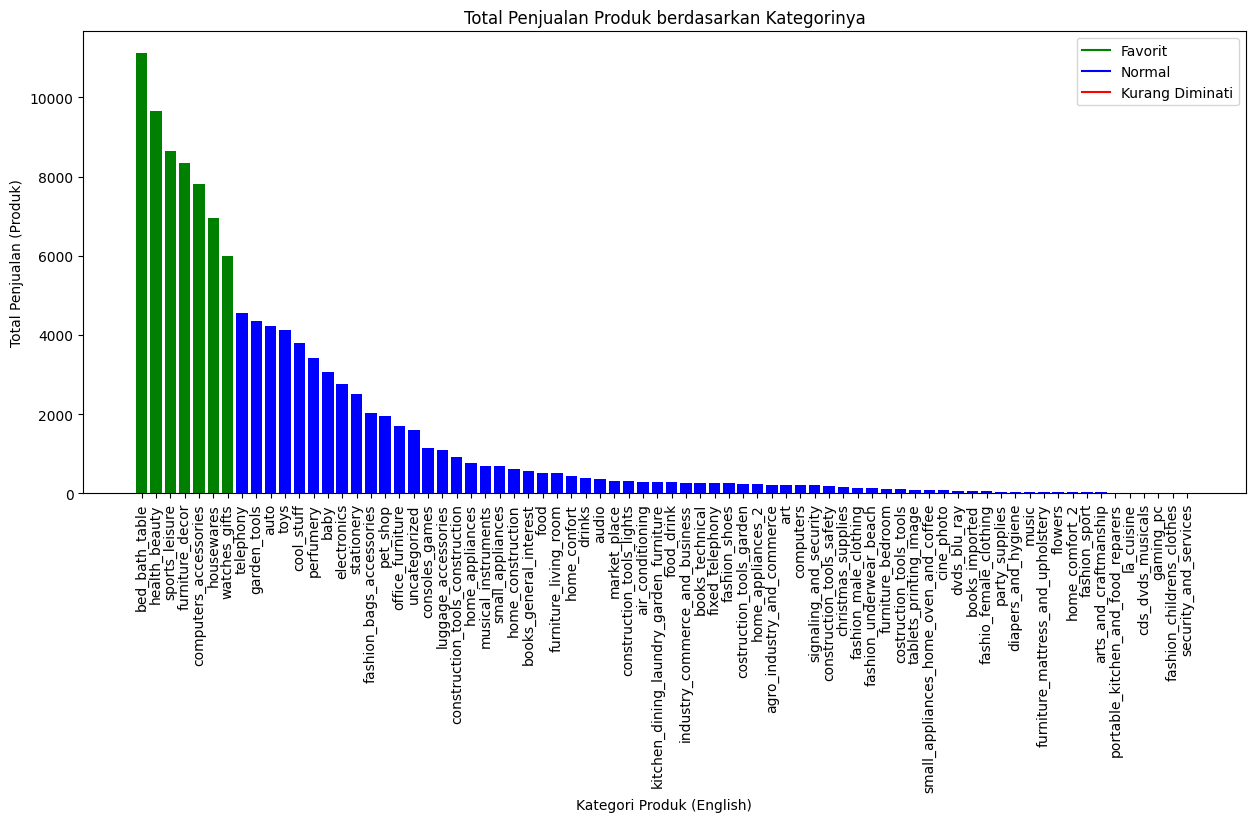

In [37]:
#Visualisasi menggunakan bar chart
plt.figure(figsize=(15, 6))
colors = {'favorite': 'green', 'normal': 'blue', 'not favorite': 'red'}
plt.bar(category_counts['product_category_name_english'], category_counts['total_items'], color=category_counts['category_status'].map(colors))
plt.xlabel('Kategori Produk (English)')
plt.xticks(rotation=90)
plt.ylabel('Total Penjualan (Produk)')
plt.title('Total Penjualan Produk berdasarkan Kategorinya')
legend_labels = {'favorite': 'Favorit', 'normal': 'Normal', 'not favorite': 'Kurang Diminati'}
plt.legend(handles=[plt.Line2D([0], [0], color=colors[key], label=legend_labels[key]) for key in legend_labels.keys()])

plt.show()

Dari hasil visualisasi diatas kita dapat mengetahui ada beberapa kategori produk yanh termasuk ke dalam kategori favorit. Selanjutnya kita akan mencari tahu berapa persentase penjualan produk untuk kategori favorit, normal, dan kurang diminati menggunakan pie chart.

In [38]:
#Mengelompokkan berdasarkan category_status dan menjumlahkan total_items
status_totals = category_counts.groupby('category_status', observed=False)['total_items'].sum().reset_index(name='total_items')

print(status_totals)

  category_status  total_items
0    not favorite           19
1          normal        54089
2        favorite        58542


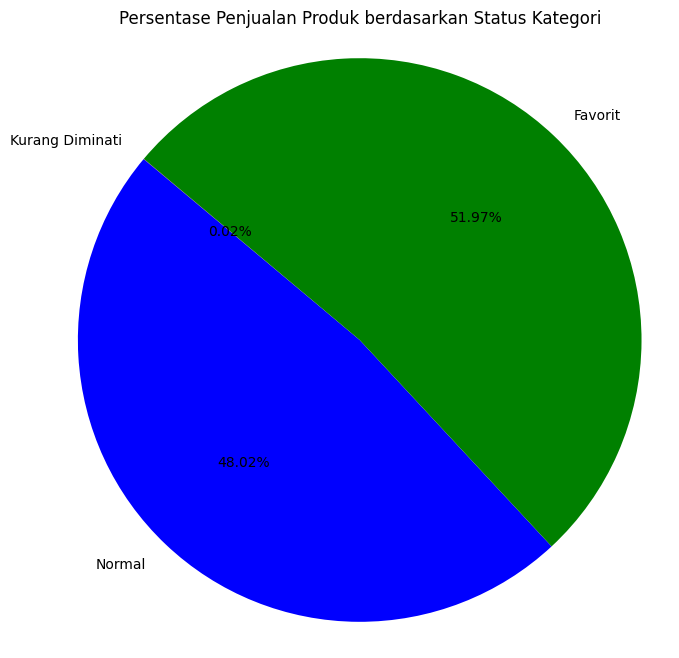

In [39]:
#Visualisasi menggunakan pie chart
plt.figure(figsize=(8, 8))
labels = ['Kurang Diminati', 'Normal', 'Favorit'] #status_totals['category_status']
sizes = status_totals['total_items']
colors = ['red', 'blue', 'green']

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Persentase Penjualan Produk berdasarkan Status Kategori')
plt.show()

Dari visualisasi di atas kita bisa mengetahui persentase penjualan produk setiap status kategorinya. </br>
Kategori Favorit         : 51,97% (7 Kategori) </br>
Kategori Normal          : 48,02% (64 Kategori) </br>
Kategori Kurang Diminati : 0,02% (3 Kategori)

Untuk tahap analisis lebih lanjut, akan dilakukan analisis klastering menggunakan algoritma K-Means untuk mengelompokkan kategori produk berdasarkan pola pembelian produk. Klastering adalah teknik analisis data yang digunakan untuk mengelompokkan objek/data menjadi kelompok-kelompok yang memiliki kesamaan tertentu. Alasan utama di balik pembuatan klastering adalah untuk mengidentifikasi pola tersembunyi dalam data yang mungkin sulit dilihat secara langsung. Klastering dapat membantu dalam mengidentifikasi segmentasi pelanggan, pola pembelian yang dapat memberikan wawasan berharga untuk pengambilan keputusan.

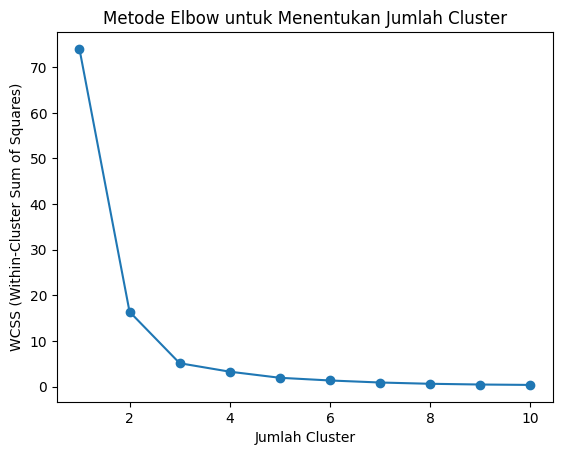

In [40]:
category_counts_copy = category_counts[['product_category_name_english', 'total_items']].copy()

#Rename nama kolom untuk memudahkan proses klastering
category_counts_copy = category_counts_copy.rename(columns={'product_category_name_english': 'Kategori_Produk', 'total_items': 'Jumlah_Pembelian'})

#Pemilihan fitur untuk analisis klastering
features_for_clustering = category_counts_copy[['Jumlah_Pembelian']]

#Standarisasi Fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

#Menentukan jumlah cluster menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

#Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

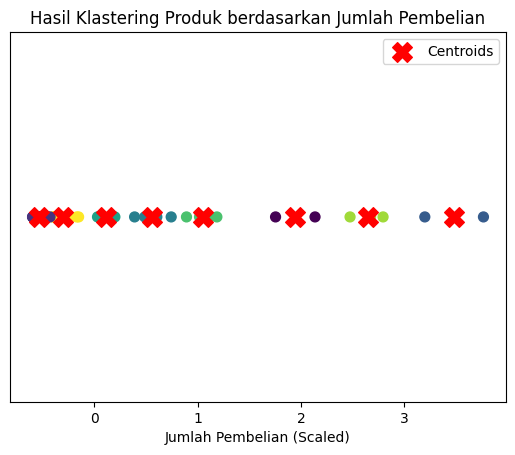

In [41]:
#Memilih jumlah cluster yang optimal dan melakukan clustering
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

#Menambahkan kolom 'Cluster' ke DataFrame
category_counts_copy['Cluster'] = clusters

#Visualisasi data hasil klastering
plt.scatter(features_scaled[:, 0], [0] * len(features_scaled), c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * optimal_clusters, s=200, c='red', marker='X', label='Centroids')
plt.title('Hasil Klastering Produk berdasarkan Jumlah Pembelian')
plt.xlabel('Jumlah Pembelian (Scaled)')
plt.yticks([])
plt.legend()
plt.show()

Dalam konteks klastering kategori produk berdasarkan jumlah pembelian, hasil klastering memberikan kelompok-kelompok kategori produk yang memiliki perilaku pembelian serupa. Pemilihan jumlah kluster didasarkan pada plot analisis metode Elbow, yang mencoba menemukan jumlah kluster optimal. Dalam plot Elbow terdapat 10 kluster, namun terdapat penyesuaian menjadi 8 kluster (dilihat dari penyebaran Centroids/Titik Pusat Kluster). Setiap kluster mewakili sekelompok kategori produk yang memiliki karakteristik pembelian yang mirip. Dengan demikian, hasil klastering memberikan pandangan yang lebih terperinci tentang bagaimana produk berbeda-beda dalam hal perilaku pembelian mereka.

### Pertanyaan 2: 

Dari hasil analisis sebelumnya, kita sudah mengetahui Jumlah Transaksi dan Total Nominal Pembayaran untuk 4 Tipe Pembayaran yang tercatat. Selanjutnya kita akan menampilkan perbandingannya ke dalam 2 chart sekaligus.ti.

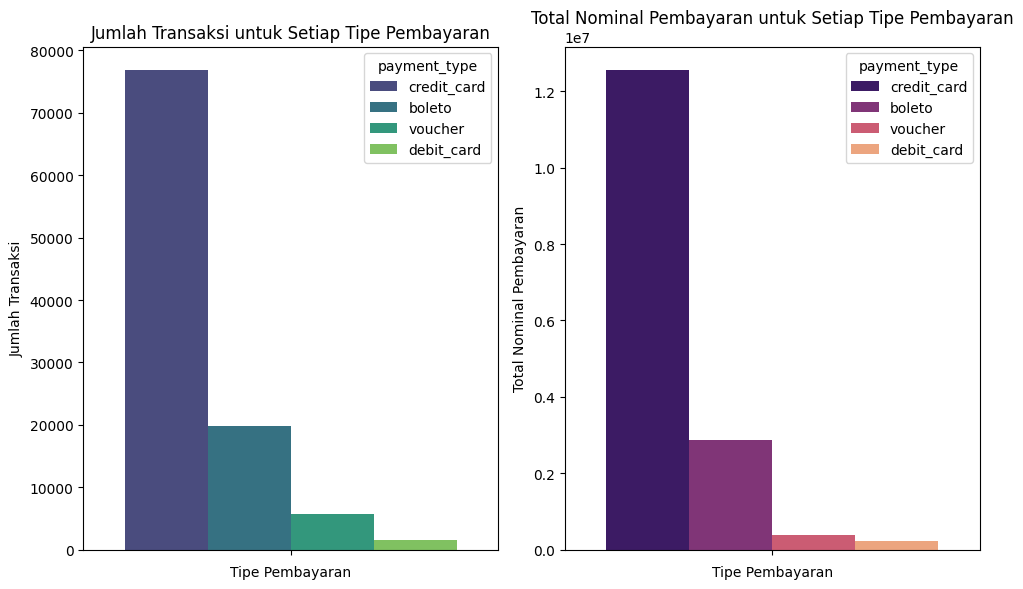

In [42]:
plt.figure(figsize=(10, 6))

#Visualisasi jumlah transaksi menggunkan bar chart
plt.subplot(1, 2, 1)
sns.barplot(hue=df_payments_summary.index, y='Jumlah Transaksi', data=df_payments_summary, palette='viridis')
plt.title('Jumlah Transaksi untuk Setiap Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Transaksi')

#Visualisasi total nominal pembayaran menggunakan bar chart
plt.subplot(1, 2, 2)
sns.barplot(hue=df_payments_summary.index, y='Total Nominal Pembayaran', data=df_payments_summary, palette='magma')
plt.title('Total Nominal Pembayaran untuk Setiap Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Total Nominal Pembayaran')

plt.tight_layout()
plt.show()

Dari visualisasi di atas, dikarenakan kedua chart berbanding lurus maka kita bisa fokus pada satu variabel saja. Untuk itu kita akan fokus kepada Jumlah Transaksi untuk setiap Tipe Pembayaran yang akan dicari tahu persentasenya menggunakan pie chart.

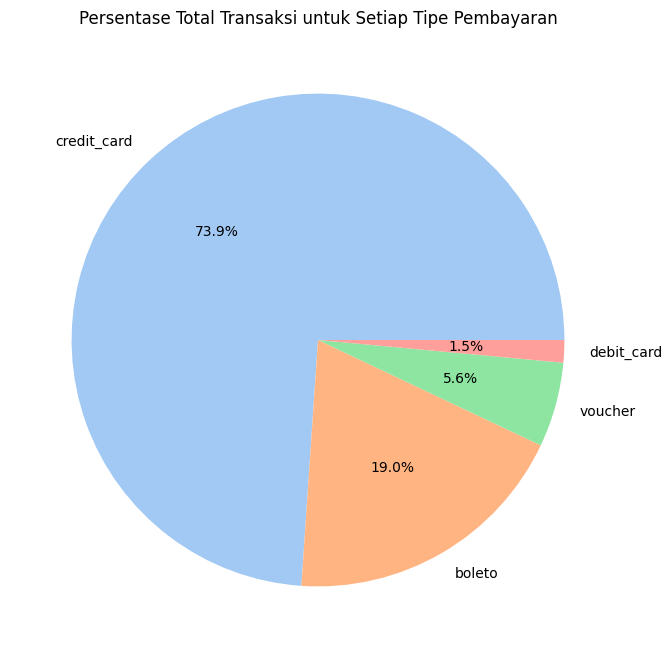

In [43]:
#Visualisasi menggunakan pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_payments_summary['Jumlah Transaksi'], labels=df_payments_summary.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Persentase Total Transaksi untuk Setiap Tipe Pembayaran')
plt.show()

Dari visualisasi di atas kita bisa mengetahui persentase Total Transaksi untuk setiap Tipe Pembayaran. </br>
Kartu Kredit : 73,9% </br>
Boleto       : 19,0% </br>
Voucher      : 5,6% </br>
Kartu Debit  : 1,5%

### Pertanyaan 3: 

Permasalahan 3

Hasil analisis pada tahap EDA mendapatkan data pesanan yang mana data tersebut ditampilkan berdasarkan tanggal dan bulan pemesanan pembelian. Selanjutnya dari data tersebut kita implentasikan dalam visualisasi diagram bar.

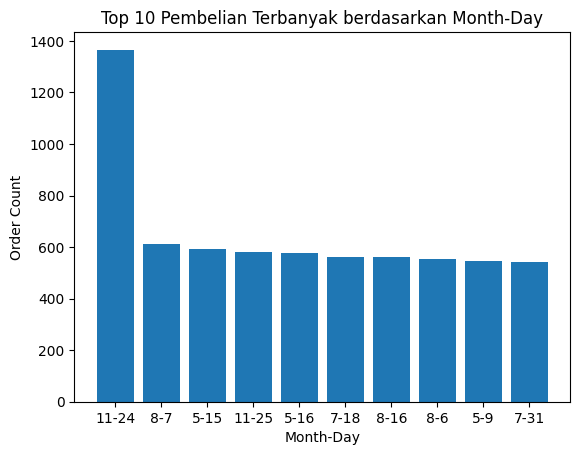

In [44]:
df_order_merge['order_purchase_timestamp'] = pd.to_datetime(df_order_merge['order_purchase_timestamp'])

df_order_merge['month'] = df_order_merge['order_purchase_timestamp'].dt.month
df_order_merge['day'] = df_order_merge['order_purchase_timestamp'].dt.day

df_count_order = df_order_merge.groupby(['month', 'day'])['order_purchase_timestamp'].count().reset_index()
df_count_order.columns = ['month', 'day', 'count']

df_result = df_count_order.sort_values('count', ascending=False)

max = df_result.head(10)

month_day_labels = []
for index, row in max.iterrows():
    month_day_labels.append(f"{row['month']}-{row['day']}")

plt.bar(month_day_labels, max['count'])
plt.xlabel('Month-Day')
plt.ylabel('Order Count')
plt.title('Top 10 Pembelian Terbanyak berdasarkan Month-Day')
plt.show()


Dari data di atas didapat bahwa pemesanan pembelian tertinggi terdapat pada setiap bulan November sekitar tanggal 24. Pada Bulan November dan Desember, penduduk di Brazil mempersiapkan hari Natal di tanggal 25 Desember. Dari sini, kita dapat melihat bahwa pemesanan pembelian lainnya tidak berkolerasi dengan hari perayaan tertentu di Brazil. Berikut informasi tambahan hari libur nasional di Brazil.

![perayaan_brazil](https://media.istockphoto.com/id/881720042/id/foto/kalender-tahun-2018-dengan-hari-libur-nasional-dan-hari-libur-bank-untuk-brasil.jpg?s=1024x1024&w=is&k=20&c=RgN0rez1_G69_A4W49tuxDheGDd316UlMeZLmAdCzW8=)

### Pertanyaan 4: 

Permasalahan 4

Hasil analisis pada tahad EDA mendapatkan 5 tempat yang menjadi tempat tinggal customer yang sering melakukan belanja dan 5 tempat tinggal customer yang hanya sekali melakukan belanja.

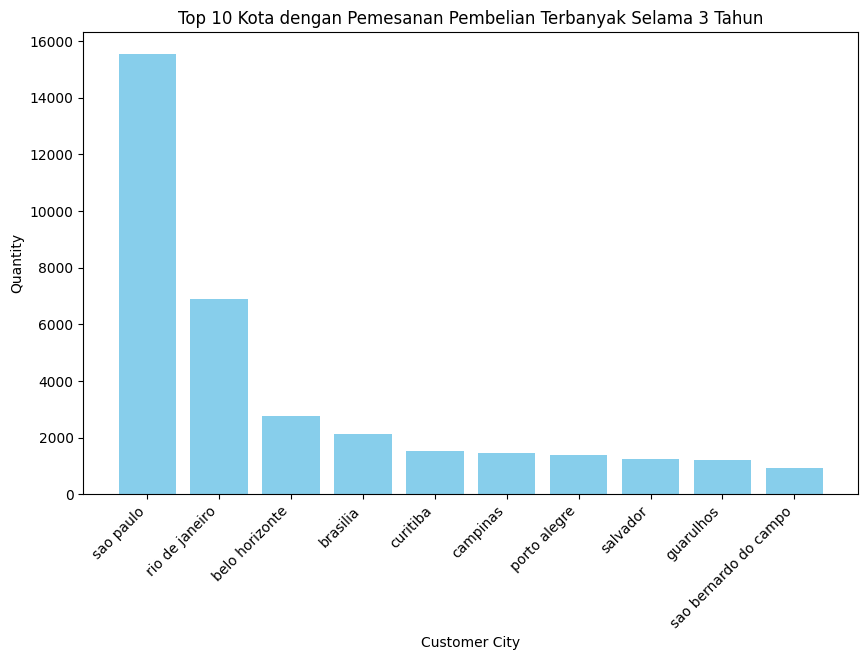

In [45]:
max = 10

city_counts_df_sort = city_counts_df.sort_values('qty', ascending=False)

top_cities_df = city_counts_df_sort.head(max)

plt.figure(figsize=(10, 6))
plt.bar(top_cities_df['customer_city'], top_cities_df['qty'], color='skyblue')
plt.xlabel('Customer City')
plt.ylabel('Quantity')
plt.title(f'Top {max} Kota dengan Pemesanan Pembelian Terbanyak Selama 3 Tahun')
plt.xticks(rotation=45, ha='right') 
plt.show()

Pada Diagram di atas diperoleh bahwa kota Sao Paulo menjadi kota dengan Pemesanan Terbanyak selama 3 tahun terakhir. Setelah dilakukan analisis secara terpisah bahwa Kota Sao Paulo merupakan kota terbesar di Brasil

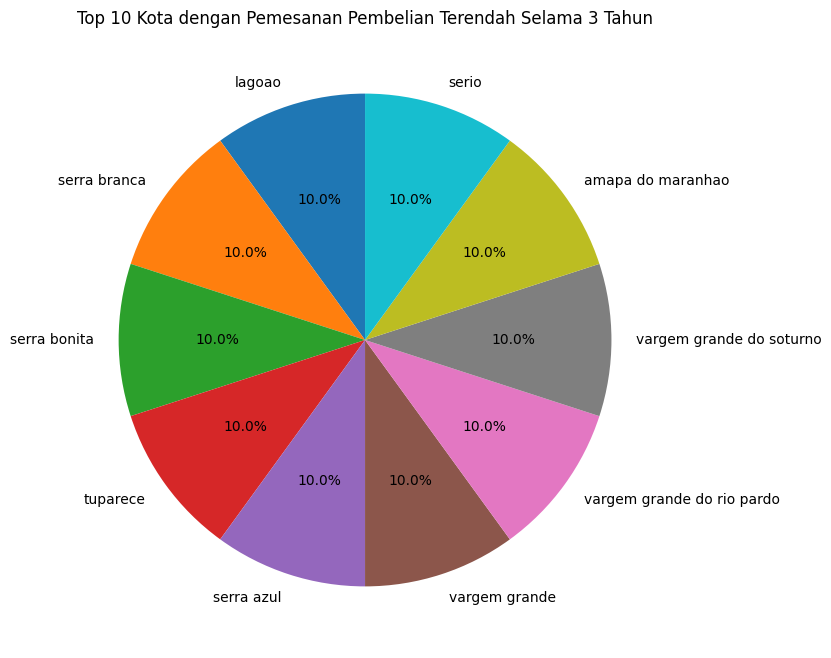

In [46]:
top_n = 10

city_counts_df_sort = city_counts_df.sort_values('qty')

top_cities_df = city_counts_df_sort.head(top_n)

plt.figure(figsize=(8, 8))
plt.pie(
    top_cities_df['qty'],
    labels=top_cities_df['customer_city'],
    autopct='%1.1f%%',
    startangle=90)
plt.title(f'Top {top_n} Kota dengan Pemesanan Pembelian Terendah Selama 3 Tahun')
plt.show()

Dari 10 sampel di atas didapat bahwa 10 kota tersebut hanya memesan 1 kali selama 3 tahun. Dari hasil analisis terpisah bahwa kota-kota dengan pemesanan pembelian terendah merupakan kota kecil yang sebagian besar merupakan pedesaan.

### Pertanyaan 5: 

Dari hasil analisis sebelumnya, kita sudah mengetahui jumlah pelanggan yang melakukan pembelian dan berapa banyak pelanggan yang melakukan pembelian hanya sekali dan tidak kembali lagi. Selanjutnya kita akan menampilkan perbandingannya ke dalam bar chart

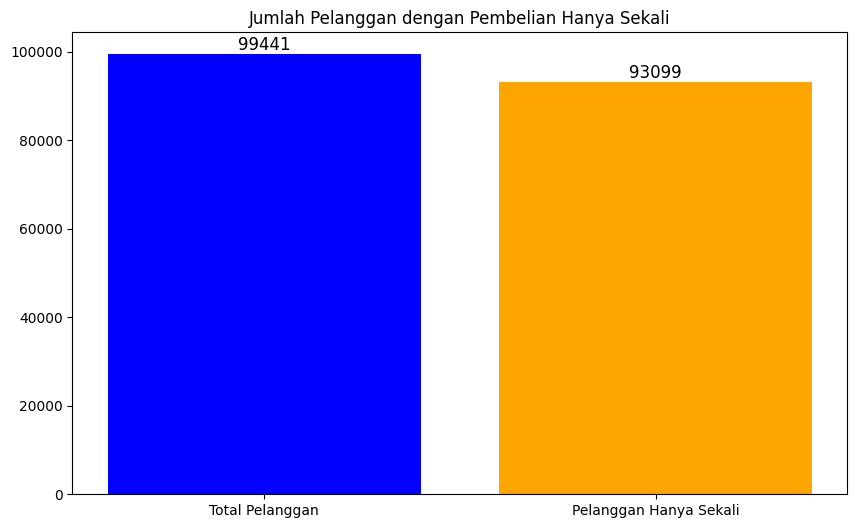

In [47]:
plt.figure(figsize=(10, 6))

# Visualisasi jumlah pelanggan menggunakan bar chart
plt.bar(['Total Pelanggan'], [total_customers], color='blue')
plt.text(0, total_customers, f'{total_customers}', ha='center', va='bottom', fontsize=12, color='black')
plt.title('Jumlah Pelanggan')

# Visualisasi jumlah pelanggan dengan pembelian hanya sekali menggunakan bar chart
plt.bar(['Pelanggan Hanya Sekali'], [single_order_customers_count], color='orange')
plt.text(1, single_order_customers_count, f'{single_order_customers_count}', ha='center', va='bottom', fontsize=12, color='black')
plt.title('Jumlah Pelanggan dengan Pembelian Hanya Sekali')

# Menampilkan chart
plt.show()

Dari visualisasi di atas kita bisa mengetahui jumlah total pelanggan dan jumlah total pelanggan dengan pembelian hanya sekali.

### Pertanyaan 6: 

Dari hasil analisis sebelumnya, kita sudah mengetahui jumlah pelanggan yang cenderung membeli produk dengan nilai transaksi lebih rendah dan nilai transaksi lebih tinggi 
Nilai Transaksi Rendah: 48120 </br>
Nilai Transaksi Tinggi: 4178 </br>
Kita akan mengelompokkan jumlah pelanggan yang cenderung membeli produk dengan nilai transaksi lebih rendah dan nilai transaksi lebih tinggi, selanjutnya kita akan menampilkan perbandingannya ke dalam bar chart

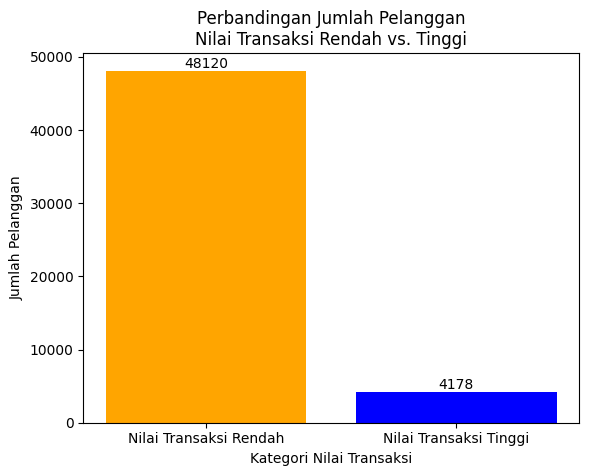

In [48]:
# Data untuk bar chart
num_low_value_buyers = len(low_value_buyers)
num_high_value_buyers = len(high_value_buyers)
values = [num_low_value_buyers, num_high_value_buyers]
categories = ['Nilai Transaksi Rendah', 'Nilai Transaksi Tinggi']

# Plot bar chart
plt.bar(categories, values, color=['orange', 'blue'])
plt.title('Perbandingan Jumlah Pelanggan\nNilai Transaksi Rendah vs. Tinggi')
plt.xlabel('Kategori Nilai Transaksi')
plt.ylabel('Jumlah Pelanggan')

for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan chart
plt.show()

## Conclusion

### Pertanyaan 1
- Dengan melihat persentase penjualan produk berdasarkan status kategorinya, dapat disimpulkan bahwa penjualan produk dalam kategori Normal dan Favorit menunjukkan variasi yang baik dalam penjualan.
- Meskipun kategori Favorit menyumbang lebih dari setengah persentase penjualan, total produk yang terjual dan termasuk dalam kategori Kurang Diminati masih dalam batas wajar karena kurang dari 1% dari keseluruhan penjualan produk.
- Adanya variasi yang signifikan dalam Kategori Normal menunjukkan keberhasilan dalam menjual berbagai jenis produk.
</br></br>
dari visualisasi yang ditampilkan, untuk peningkatan penjualan, diharapkan stakeholder mampu memfokuskan upaya pada kategori produk Favorit, sementara kategori Kurang Diminati dapat menjadi fokus untuk strategi revitalisasi atau peningkatan pemasaran.

### Pertanyaan 2
- Dengan melihat persentase jumlah transaksi berdasarkan tipe pembayarannya, dapat disimpulkan bahwa tipe pembayaran yang mendominasi transaksi adalah Kartu Kredit, yakni mencakup sekitar 73,9% dari total transaksi.
- Metode pembayaran Boleto memiliki kontribusi yang signifikan dengan sekitar 19,0% dari total transaksi. Meskipun jumlah transaksinya lebih rendah dibandingkan Kartu Kredit, Boleto memberikan sumbangan yang substansial terhadap total nominal pembayaran.
- Tipe pembayaran lainnya, seperti Voucher dan Kartu Debit, memiliki kontribusi yang lebih kecil dalam jumlah transaksi dan total nominal pembayaran.
</br></br>
dari visualisasi yang ditampilkan, diharapkan stakeholder mendapatkan pemahaman yang baik tentang preferensi pembayaran pelanggan. Yang mana hal ini dapat membantu dalam menyesuaikan strategi pemasaran dan penawaran yang lebih baik. Misalnya, memberikan insentif atau promo khusus untuk pengguna Kartu Kredit atau strategi peningkatan penggunaan Voucher.

### Pertanyaan 3
- Sebagian besar pemesanan barang tidak mempunyai korelasi dengan hari besar di Brazil.
- Di setiap akhir Bulan November merupakan puncak pemesanan barang yang mana bulan tersebut berdekatan dengan Hari Natal.

Dikarenakan point pertama di atas, maka dapat disimpulkan bahwa pelanggan atau penduduk brazil membeli barang sesuai kebutuhan mereka. Hal ini dapat dipertahankan dengan menawarkan barang dengan jenis dan fungsi yang sama dengan kebutuhan mereka. Selain itu, untuk meningkatkan volume pembelian, maka dalam memberikan penawaran barang-barang kebutuhan disisipkan juga penawaran barang-barang menarik yang memikat pelanggan. Hal ini juga dapat diterapkan pada setiap mendekati perayaan-perayaan tertentu. 

### Pertanyaan 4
- Dari hasil analisis, didapat bahwa penduduk di kota-kota besar menjadi penduduk dengan jumlah pemesanan barang tertinggi dibandingkan dengan kota-kota pedesaan di Brasil.
- Perbedaan jumlah pemesanan penduduk di kota besar dengan penduduk yang tinggal di kota pedesaan sangat signifikan.

Hal ini dapat menjadi perhatian agar pemasaran produk dapat menjangkau kota pedesaan di Brasil dimulai dari apa yang mereka butuhkan, transportasi, dan lamanya barang yang dikirim dari luar kota yang tentunya dengan pendekatan keseharian penduduk di kota-kota tersebut. Untuk di kota-kota besar dapat dipertahankan dan ditingkatkan dengan pendekatan tren dan tawaran diskon yang terjadwalkan sehingga dapat menahan pembeli.

### Pertanyaan 5
- Dengan melihat jumlah pelanggan yang tidak kembali setelah pembelian pertama cukup signifikan, dapat disimpulkan bahwa perlu dilakukan analisis lebih lanjut untuk memahami alasan di balik perilaku ini.
- Strategi retensi pelanggan dan program loyalitas dapat dikembangkan untuk mendorong keterlibatan pelanggan setelah pembelian pertama.
- Penting untuk memahami preferensi dan kebutuhan pelanggan agar dapat menawarkan pengalaman yang memikat dan memuaskan, sehingga mendorong pelanggan untuk kembali lagi.
</br></br>Dari visualisasi yang ditampilkan, perusahaan dapat mempertimbangkan untuk mengimplementasikan strategi retensi pelanggan yang lebih kuat dan fokus pada membangun hubungan jangka panjang dengan pelanggan. Misalnya, seperti melakukan pengembangan kampanye pemasaran yang ditargetkan untuk memikat kembali pelanggan yang hanya melakukan pembelian sekali dengan menawarkan insentif atau promosi khusus.
### Pertanyaan 6
- Pelanggan dengan nilai transaksi rendah memiliki jumlah yang signifikan lebih besar dibandingkan dengan kelompok pelanggan nilai transaksi tinggi.
- Untuk pelanggan dengan nilai transaksi rendah, mungkin diperlukan strategi pemasaran yang fokus pada penawaran khusus, diskon, atau produk dengan harga yang lebih terjangkau.
- Pelanggan dengan nilai transaksi tinggi dapat menjadi target kampanye pemasaran yang lebih eksklusif atau penawaran produk dan layanan premium.
</br></br>Dari visualisasi yang ditampilkan, perusahaan dapat mengadopsi strategi pemasaran yang terpersonalisasi untuk setiap segmen pelanggan berdasarkan nilai transaksi. Misalnya dengan fokus pada penawaran khusus, diskon, dan produk yang sesuai dapat meningkatkan nilai transaksi.

</br>
Python : 3.11.5 </br>
Pandas : 2.1.3 </br>
Numpy : 1.26.2 </br>
Matplotlib : 3.8.2 </br>
Seaborn : 0.13.0 </br>
Scikit-Learn : 1.4.0 </br>
Jupyter Notebook : 7.0.6 </br>